In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pip install import-ipynb
import import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=b210a88b43147e935ba039040890b4d68024403a5a2b5c2efa321246c98fd683
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [3]:
%cd "drive/MyDrive/Bionformatics_Project/Colab"

/content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab


In [4]:
from Classes.DataManager import DataManager
from Classes.Transformer import projTransformer
from tensorflow import keras
import tensorflow as tf
import numpy as np

%load_ext tensorboard

importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/DataManager.ipynb
importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/Transformer.ipynb
Populating the interactive namespace from numpy and matplotlib
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [5]:
import os
import random as rn

os.environ['PYTHONHASHSEED'] = '42'
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

data loading takes at most 30s, we can improve it saving the numerical representation of sequences

In [12]:
dm = DataManager(transformer=True, micro=False, tf=True)
X_trainhalflife, X_trainpromoter, y_train, geneName_train, X_traintf              = dm.get_train(True, True, False)
X_validationhalflife, X_validationpromoter, y_validation, geneName_val, X_validtf = dm.get_validation(True, True, False)
X_testhalflife, X_testpromoter, y_test, geneName_test, X_testtf                   = dm.get_test(True, True, False)

Preprocessing-> Padding

In [7]:
leftpos  = 9_500          #3_000 
rightpos = 20_000         #13_500
maxlen   = rightpos-leftpos
print("maxlen: ",maxlen)

maxlen:  10500


In [8]:
X_trainpromoter_p      = keras.preprocessing.sequence.pad_sequences(X_trainpromoter,      maxlen=maxlen)
X_validationpromoter_p = keras.preprocessing.sequence.pad_sequences(X_validationpromoter, maxlen=maxlen)
X_testpromoter_p       = keras.preprocessing.sequence.pad_sequences(X_testpromoter,       maxlen=maxlen)

model built
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 10500)]      0                                            
__________________________________________________________________________________________________
token_and_position_embedding_2  (None, 10500, 32)    336160      input_7[0][0]                    
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 10500, 32)    6176        token_and_position_embedding_2[0]
__________________________________________________________________________________________________
average_pooling1d_6 (AveragePoo (None, 350, 32)      0           conv1d_4[0][0]                   
________________________________________________________________________________

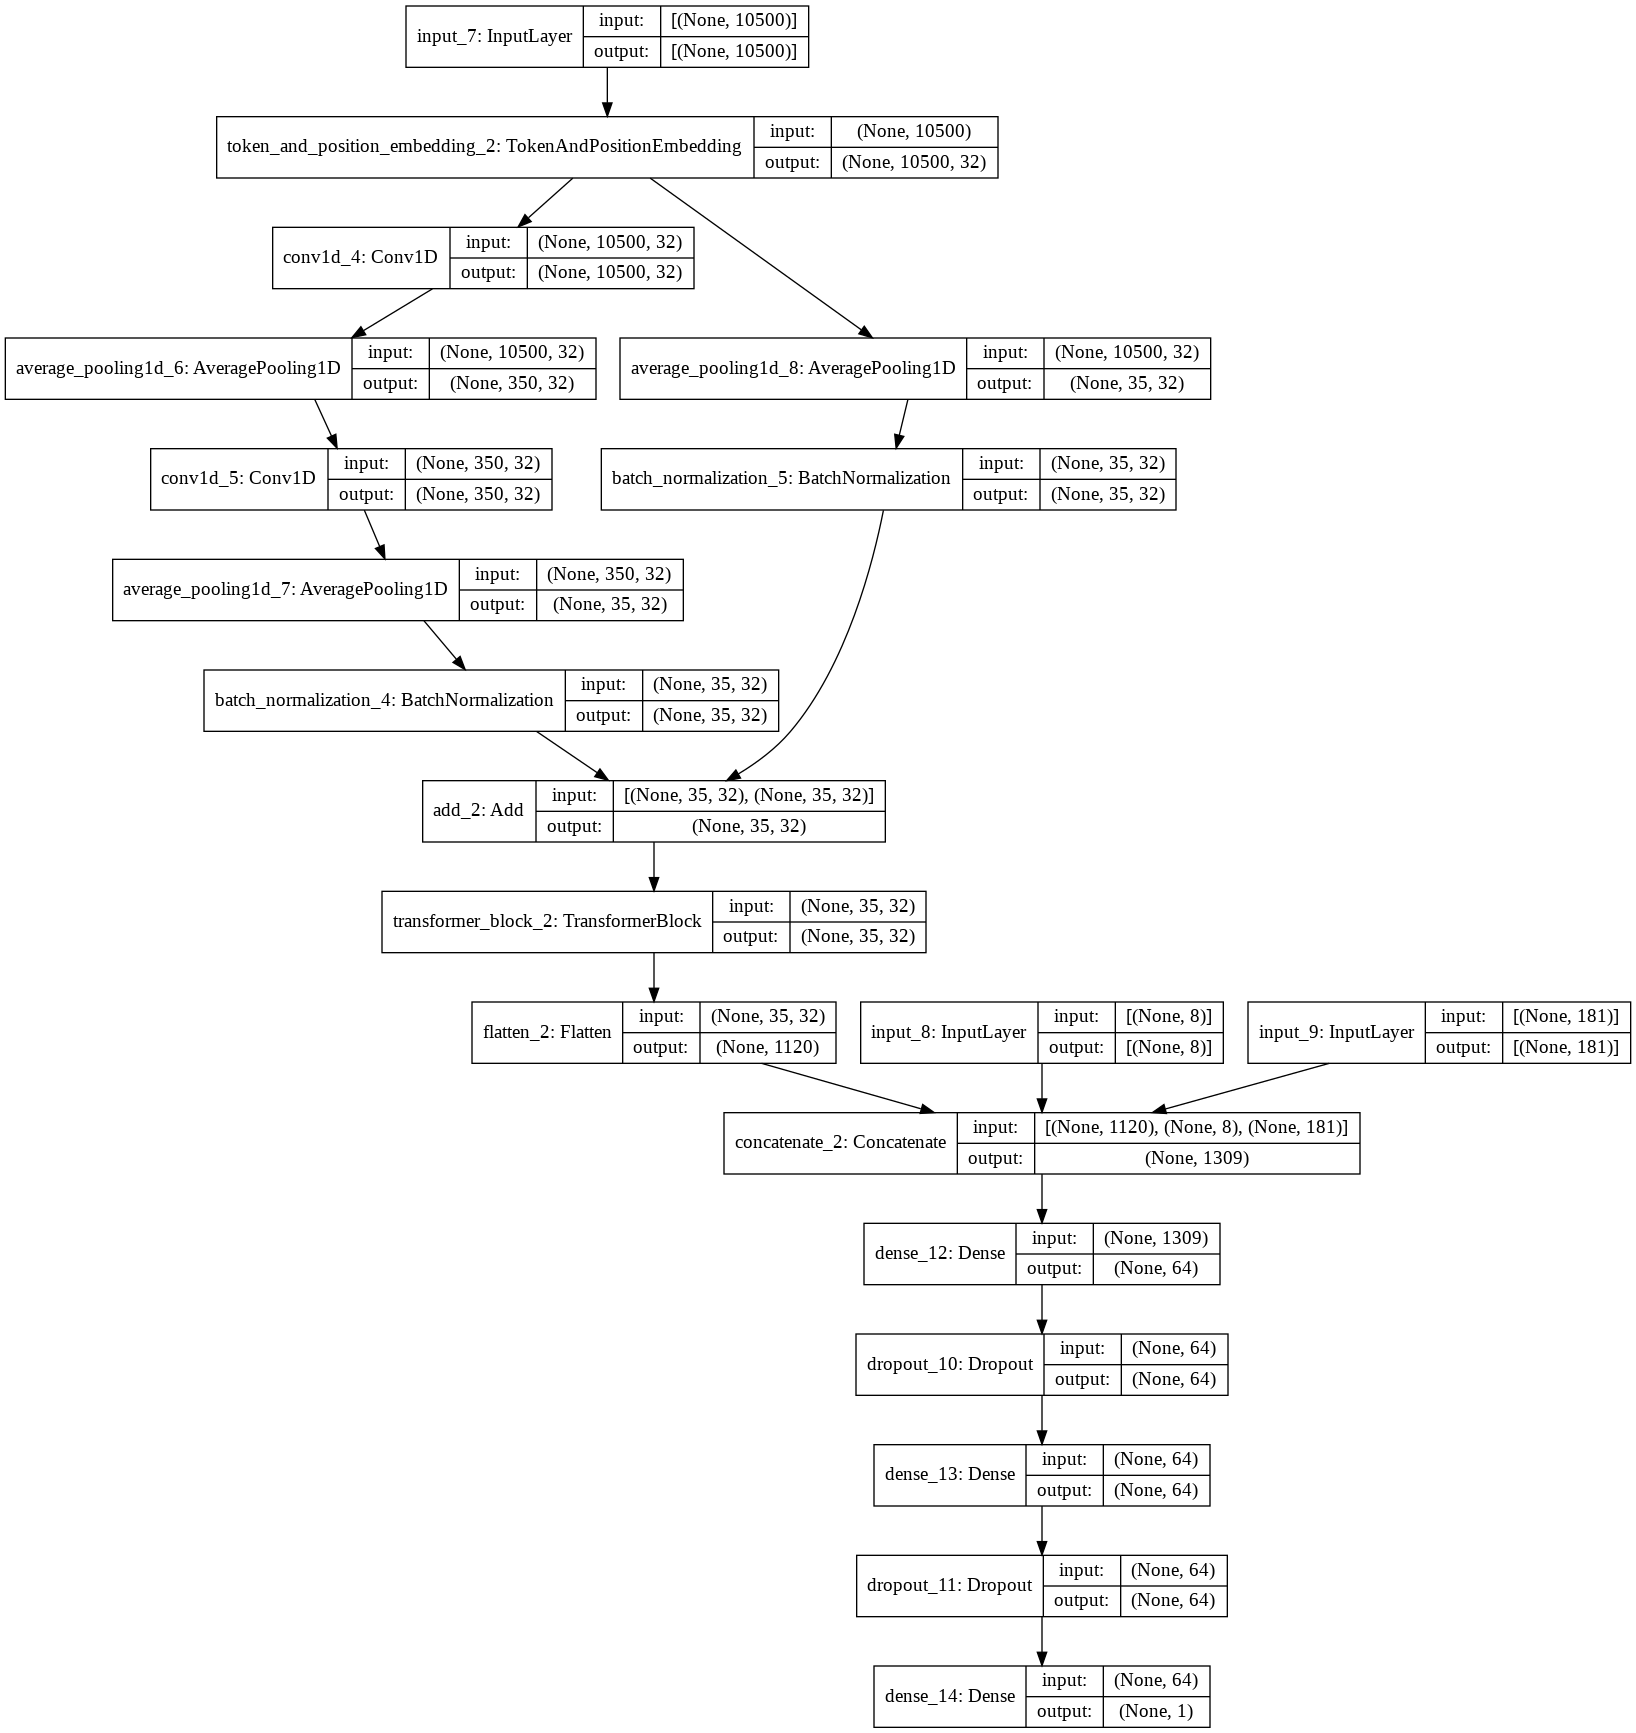


Parameters:
{'checkpoint_dir': 'WT_PHT_GPU/', 'model_type': 'TF', 'n_epochs': 300, 'batch_size': 256, 'learning_rate': 0.001, 'momentum': 0.9, 'maxlen': 10500, 'embed_dim': 32, 'num_heads': 1, 'ff_dim': 64, 'vocab_size': 5, 'dense': 64, 'dropout_rate': 0.1, 'lr_reduction_epoch': 60, 't_rate': 0.1, 'patience': 20, 'optimizer': 'SGD', 'warmup_steps': 8000, 'shuffle': True, 'logdir': None, 'loss': 'mse', 'history': '', 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7f28d629f050>}

Epoch 1/300

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 20s 307ms/step - loss: 0.6564 - val_loss: 0.5701

Epoch 00001: val_loss improved from inf to 0.57005, saving model to Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 2/300

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 297ms/step - loss: 0.4217 - val_loss: 0.4606

Epoch 00002: val_loss improved from 0.57005 to 0.46065, saving model to Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 3/300

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 296ms/step - loss: 0.3962 - val_loss: 0.4411

Epoch 00003: val_loss improved from 0.46065 to 0.44106, saving model to Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 4/300

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 298ms/step - loss: 0.3778 - val_loss: 0.4056

Epoch 00004: val_loss improved from 0.44106 to 0.40557, saving model to Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 5/300

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 298ms/step - loss: 0.3683 - val_loss: 0.4035

Epoch 00005: val_loss improved from 0.40557 to 0.40352, saving model to Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 6/300

Epoch 00006: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 299ms/step - loss: 0.3617 - val_loss: 0.3995

Epoch 00006: val_loss improved from 0.40352 to 0.39946, saving model to Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 7/300

Epoch 00007: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 299ms/step - loss: 0.3576 - val_loss: 0.3655

Epoch 00007: val_loss improved from 0.39946 to 0.36547, saving model to Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 8/300

Epoch 00008: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 300ms/step - loss: 0.3510 - val_loss: 0.3635

Epoch 00008: val_loss improved from 0.36547 to 0.36347, saving model to Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 9/300

Epoch 00009: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 299ms/step - loss: 0.3479 - val_loss: 0.3534

Epoch 00009: val_loss improved from 0.36347 to 0.35338, saving model to Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 10/300

Epoch 00010: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 299ms/step - loss: 0.3399 - val_loss: 0.3227

Epoch 00010: val_loss improved from 0.35338 to 0.32267, saving model to Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 11/300

Epoch 00011: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 299ms/step - loss: 0.3406 - val_loss: 0.3118

Epoch 00011: val_loss improved from 0.32267 to 0.31176, saving model to Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 12/300

Epoch 00012: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 301ms/step - loss: 0.3383 - val_loss: 0.3175

Epoch 00012: val_loss did not improve from 0.31176
Epoch 13/300

Epoch 00013: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 299ms/step - loss: 0.3335 - val_loss: 0.3152

Epoch 00013: val_loss did not improve from 0.31176
Epoch 14/300

Epoch 00014: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 300ms/step - loss: 0.3337 - val_loss: 0.3023

Epoch 00014: val_loss improved from 0.31176 to 0.30226, saving model to Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 15/300

Epoch 00015: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 297ms/step - loss: 0.3298 - val_loss: 0.3002

Epoch 00015: val_loss improved from 0.30226 to 0.30017, saving model to Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 16/300

Epoch 00016: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 300ms/step - loss: 0.3242 - val_loss: 0.3001

Epoch 00016: val_loss improved from 0.30017 to 0.30007, saving model to Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 17/300

Epoch 00017: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 299ms/step - loss: 0.3161 - val_loss: 0.3012

Epoch 00017: val_loss did not improve from 0.30007
Epoch 18/300

Epoch 00018: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 299ms/step - loss: 0.3178 - val_loss: 0.2898

Epoch 00018: val_loss improved from 0.30007 to 0.28981, saving model to Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 19/300

Epoch 00019: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 299ms/step - loss: 0.3158 - val_loss: 0.2940

Epoch 00019: val_loss did not improve from 0.28981
Epoch 20/300

Epoch 00020: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 299ms/step - loss: 0.3140 - val_loss: 0.2970

Epoch 00020: val_loss did not improve from 0.28981
Epoch 21/300

Epoch 00021: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 299ms/step - loss: 0.3084 - val_loss: 0.2881

Epoch 00021: val_loss improved from 0.28981 to 0.28807, saving model to Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 22/300

Epoch 00022: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 299ms/step - loss: 0.3082 - val_loss: 0.2894

Epoch 00022: val_loss did not improve from 0.28807
Epoch 23/300

Epoch 00023: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 298ms/step - loss: 0.3085 - val_loss: 0.2924

Epoch 00023: val_loss did not improve from 0.28807
Epoch 24/300

Epoch 00024: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 301ms/step - loss: 0.3051 - val_loss: 0.3057

Epoch 00024: val_loss did not improve from 0.28807
Epoch 25/300

Epoch 00025: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 299ms/step - loss: 0.3035 - val_loss: 0.3182

Epoch 00025: val_loss did not improve from 0.28807
Epoch 26/300

Epoch 00026: LearningRateS

INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 27/300

Epoch 00027: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 299ms/step - loss: 0.3006 - val_loss: 0.2845

Epoch 00027: val_loss did not improve from 0.28032
Epoch 28/300

Epoch 00028: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 299ms/step - loss: 0.3024 - val_loss: 0.2856

Epoch 00028: val_loss did not improve from 0.28032
Epoch 29/300

Epoch 00029: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 299ms/step - loss: 0.2992 - val_loss: 0.2820

Epoch 00029: val_loss did not improve from 0.28032
Epoch 30/300

Epoch 00030: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 299ms/step - loss: 0.2958 - val_loss: 0.2815

Epoch 00030: val_loss did not improve from 0.28032
Epoch 31/300

Epoch 00031: LearningRateS

INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 36/300

Epoch 00036: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 298ms/step - loss: 0.2924 - val_loss: 0.2892

Epoch 00036: val_loss did not improve from 0.27486
Epoch 37/300

Epoch 00037: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 299ms/step - loss: 0.2845 - val_loss: 0.2800

Epoch 00037: val_loss did not improve from 0.27486
Epoch 38/300

Epoch 00038: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 300ms/step - loss: 0.2849 - val_loss: 0.2776

Epoch 00038: val_loss did not improve from 0.27486
Epoch 39/300

Epoch 00039: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 299ms/step - loss: 0.2825 - val_loss: 0.2763

Epoch 00039: val_loss did not improve from 0.27486
Epoch 40/300

Epoch 00040: LearningRateS

INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 47/300

Epoch 00047: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 300ms/step - loss: 0.2762 - val_loss: 0.2683

Epoch 00047: val_loss improved from 0.26885 to 0.26826, saving model to Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 48/300

Epoch 00048: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 299ms/step - loss: 0.2755 - val_loss: 0.2762

Epoch 00048: val_loss did not improve from 0.26826
Epoch 49/300

Epoch 00049: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 300ms/step - loss: 0.2714 - val_loss: 0.2802

Epoch 00049: val_loss did not improve from 0.26826
Epoch 50/300

Epoch 00050: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 300ms/step - loss: 0.2737 - val_loss: 0.2726

Epoch 00050: val_loss did not improve from 0.26826
Epoch 51/300

Epoch 00051: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 299ms/step - loss: 0.2720 - val_loss: 0.2735

Epoch 00051: val_loss did not improve from 0.26826
Epoch 52/300

Epoch 00052: LearningRateS

INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 59/300

Epoch 00059: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 300ms/step - loss: 0.2657 - val_loss: 0.2688

Epoch 00059: val_loss did not improve from 0.26636
Epoch 60/300

Epoch 00060: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
61/61 [==============================] - 18s 300ms/step - loss: 0.2665 - val_loss: 0.2753

Epoch 00060: val_loss did not improve from 0.26636
Epoch 61/300

Epoch 00061: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
61/61 [==============================] - 18s 300ms/step - loss: 0.2615 - val_loss: 0.2661

Epoch 00061: val_loss improved from 0.26636 to 0.26607, saving model to Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 62/300

Epoch 00062: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
61/61 [==============================] - 18s 298ms/step - loss: 0.2594 - val_loss: 0.2666

Epoch 00062: val_loss did not improve from 0.26607
Epoch 63/300

Epoch 00063: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
61/61 [==============================] - 18s 300ms/step - loss: 0.2588 - val_loss: 0.2658

Epoch 00063: val_loss improved from 0.26607 to 0.26584, saving model to Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 64/300

Epoch 00064: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
61/61 [==============================] - 18s 300ms/step - loss: 0.2575 - val_loss: 0.2640

Epoch 00064: val_loss improved from 0.26584 to 0.26405, saving model to Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 65/300

Epoch 00065: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
61/61 [==============================] - 18s 300ms/step - loss: 0.2588 - val_loss: 0.2680

Epoch 00065: val_loss did not improve from 0.26405
Epoch 66/300

Epoch 00066: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
61/61 [==============================] - 18s 300ms/step - loss: 0.2594 - val_loss: 0.2655

Epoch 00066: val_loss did not improve from 0.26405
Epoch 67/300

Epoch 00067: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
61/61 [==============================] - 18s 299ms/step - loss: 0.2571 - val_loss: 0.2645

Epoch 00067: val_loss did not improve from 0.26405
Epoch 68/300

Epoch 00068: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
61/61 [==============================] - 18s 300ms/step - loss: 0.2575 - val_loss: 0.2642

Epoch 00068: val_loss did not improve from 0.26405
Epoch 69/300

Epoch 00069: LearningR

INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 83/300

Epoch 00083: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
61/61 [==============================] - 18s 299ms/step - loss: 0.2565 - val_loss: 0.2633

Epoch 00083: val_loss improved from 0.26337 to 0.26325, saving model to Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 84/300

Epoch 00084: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
61/61 [==============================] - 18s 299ms/step - loss: 0.2561 - val_loss: 0.2639

Epoch 00084: val_loss did not improve from 0.26325
Epoch 85/300

Epoch 00085: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
61/61 [==============================] - 18s 300ms/step - loss: 0.2547 - val_loss: 0.2639

Epoch 00085: val_loss did not improve from 0.26325
Epoch 86/300

Epoch 00086: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
61/61 [==============================] - 18s 300ms/step - loss: 0.2527 - val_loss: 0.2634

Epoch 00086: val_loss did not improve from 0.26325
Epoch 87/300

Epoch 00087: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
61/61 [==============================] - 18s 299ms/step - loss: 0.2524 - val_loss: 0.2639

Epoch 00087: val_loss did not improve from 0.26325
Epoch 88/300

Epoch 00088: LearningR

INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/WT_PHT_GPU/bestmodel_transformer_TF/assets


Epoch 89/300

Epoch 00089: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
61/61 [==============================] - 18s 300ms/step - loss: 0.2524 - val_loss: 0.2656

Epoch 00089: val_loss did not improve from 0.26255
Epoch 90/300

Epoch 00090: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
61/61 [==============================] - 18s 300ms/step - loss: 0.2531 - val_loss: 0.2655

Epoch 00090: val_loss did not improve from 0.26255
Epoch 91/300

Epoch 00091: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
61/61 [==============================] - 18s 300ms/step - loss: 0.2518 - val_loss: 0.2637

Epoch 00091: val_loss did not improve from 0.26255
Epoch 92/300

Epoch 00092: LearningRateScheduler reducing learning rate to 0.00020000000949949026.
61/61 [==============================] - 18s 299ms/step - loss: 0.2545 - val_loss: 0.2637

Epoch 00092: val_loss did not improve from 0.26255
Epoch 93/300

Epoch 00093: LearningR

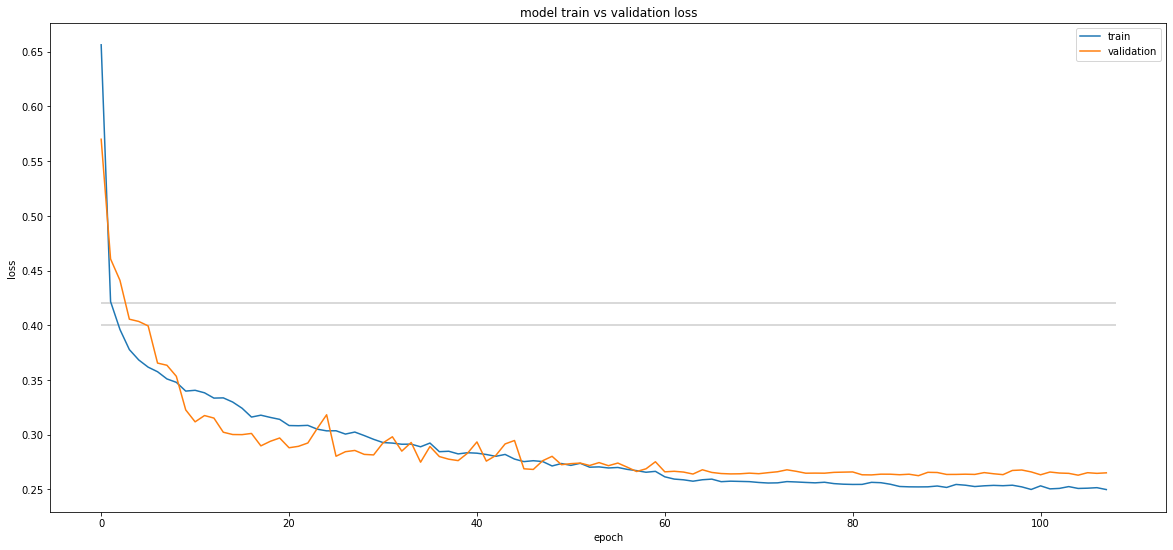

In [13]:
# # Clear any logs from previous runs
# !rm -rf ./logs/transformer_TF_0-001/

model_type="TF"
logdir = None
net = projTransformer(checkpoint_dir="WT_PHT_GPU/", model_type=model_type, n_epochs=300, batch_size=256, 
                      learning_rate=1e-3, patience=20, optimizer="SGD", vocab_size=5,
                      lr_reduction_epoch=60, maxlen=maxlen, embed_dim=32, num_heads=1, ff_dim=64, dense=64, 
                      dropout_rate=0.1, logdir=logdir, t_rate=0.1, momentum=0.9)
net.train_model([X_trainpromoter_p, X_trainhalflife, X_traintf], y_train, [X_validationpromoter_p, X_validationhalflife, X_validtf], y_validation)

In [14]:
net.evaluate([X_testpromoter_p, X_testhalflife, X_testtf], y_test)

Test R^2 = 0.742


In [15]:
net.evaluate_best([X_testpromoter_p, X_testhalflife, X_testtf], y_test)

Test R^2 = 0.744


0.7442048738987161

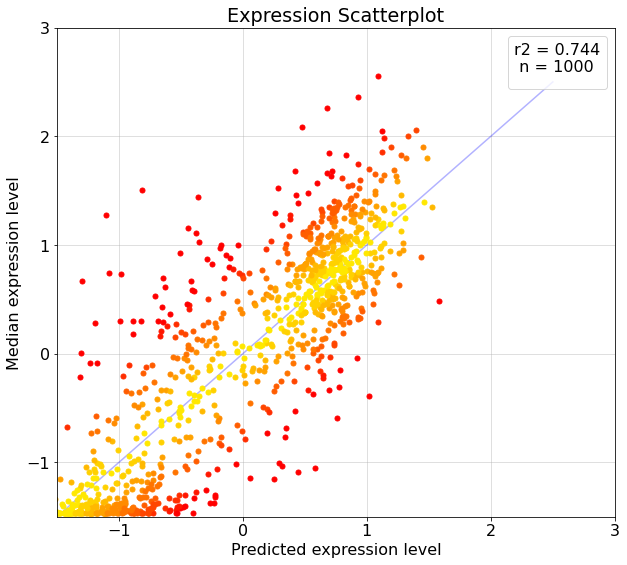

In [16]:
net.plot_r2([X_testpromoter_p, X_testhalflife, X_testtf], y_test)

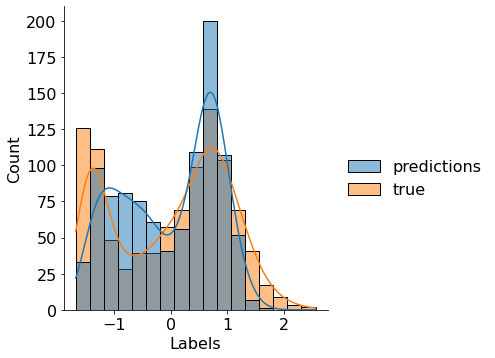

In [17]:
net.plot_kde([X_testpromoter_p, X_testhalflife, X_testtf], y_test)